<a href="https://colab.research.google.com/github/Avery1493/DS-Unit-2-Linear-Models/blob/master/module4-logistic-regression/Quinn_214_LS_DS_214_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 4*

---

# Logistic Regression


## Assignment 🌯

You'll use a [**dataset of 400+ burrito reviews**](https://srcole.github.io/100burritos/). How accurately can you predict whether a burrito is rated 'Great'?

> We have developed a 10-dimensional system for rating the burritos in San Diego. ... Generate models for what makes a burrito great and investigate correlations in its dimensions.

- [ ] Do train/validate/test split. Train on reviews from 2016 & earlier. Validate on 2017. Test on 2018 & later.
- [ ] Begin with baselines for classification.
- [ ] Use scikit-learn for logistic regression.
- [ ] Get your model's validation accuracy. (Multiple times if you try multiple iterations.)
- [ ] Get your model's test accuracy. (One time, at the end.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

- [ ] Add your own stretch goal(s) !
- [ ] Make exploratory visualizations.
- [ ] Do one-hot encoding.
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Get and plot your coefficients.
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html).

#Imports

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [0]:
# Load data downloaded from https://srcole.github.io/100burritos/
import pandas as pd
df = pd.read_csv(DATA_PATH+'burritos/burritos.csv')

In [0]:
# Derive binary classification target:
# We define a 'Great' burrito as having an
# overall rating of 4 or higher, on a 5 point scale.
# Drop unrated burritos.
df = df.dropna(subset=['overall'])
df['Great'] = df['overall'] >= 4

In [0]:
# Clean/combine the Burrito categories
df['Burrito'] = df['Burrito'].str.lower()

california = df['Burrito'].str.contains('california')
asada = df['Burrito'].str.contains('asada')
surf = df['Burrito'].str.contains('surf')
carnitas = df['Burrito'].str.contains('carnitas')

df.loc[california, 'Burrito'] = 'California'
df.loc[asada, 'Burrito'] = 'Asada'
df.loc[surf, 'Burrito'] = 'Surf & Turf'
df.loc[carnitas, 'Burrito'] = 'Carnitas'
df.loc[~california & ~asada & ~surf & ~carnitas, 'Burrito'] = 'Other'

In [0]:
# Drop some high cardinality categoricals
df = df.drop(columns=['Notes', 'Location', 'Reviewer', 'Address', 'URL', 'Neighborhood'])

In [0]:
# Drop some columns to prevent "leakage"
df = df.drop(columns=['Rec', 'overall'])

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

In [102]:
#Turn T/F to 1/0
df['Great'] = df['Great'].replace({True:1, False:0})
df.sample(5)

,Burrito,Date,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion,Taquito,Pineapple,Ham,Chile relleno,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
233,California,2016-09-18,NaN,NaN,NaN,7.90,3.5,NaN,NaN,20.5,23.0,0.86,4.0,5.0,4.0,4.0,3.0,4.0,3.5,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
145,Other,2016-06-06,NaN,NaN,NaN,6.99,3.5,NaN,NaN,18.5,21.0,0.65,4.0,3.5,4.0,3.5,4.0,5.0,2.5,4.0,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x,NaN,x,x,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
49,Other,2016-03-21,NaN,NaN,NaN,7.30,3.0,NaN,NaN,NaN,NaN,NaN,3.0,4.5,3.5,3.0,3.0,2.0,3.5,2.5,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
13,Other,2016-02-11,NaN,NaN,NaN,6.99,3.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0,1.5,2.5,4.0,4.0,3.0,4.5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
287,California,2016-11-16,NaN,NaN,NaN,7.90,3.5,NaN,NaN,NaN,NaN,NaN,4.0,3.5,4.7,4.0,4.5,4.5,4.5,4.0,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [0]:
df.info()

# EDA

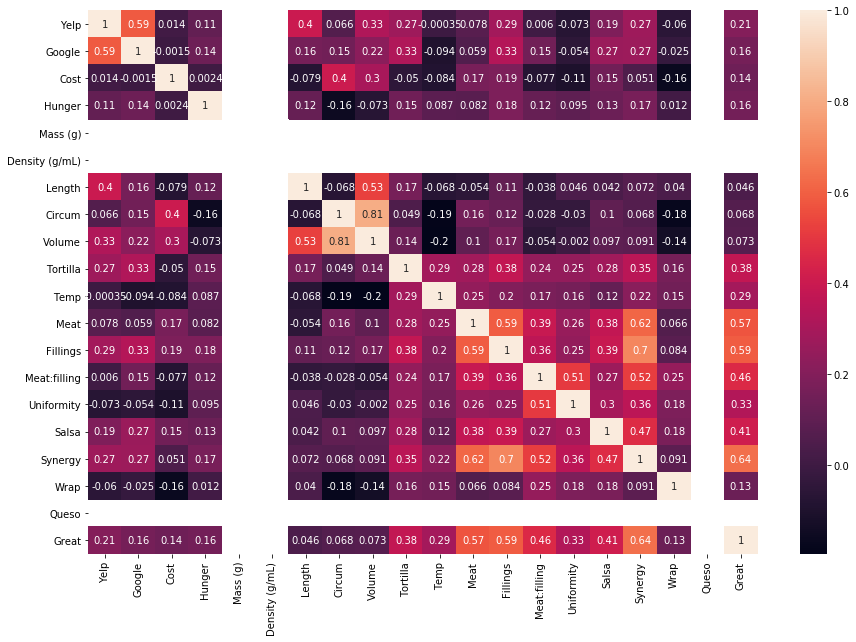

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),annot = True)


In [167]:
print(train.shape)
train.sample(2)

(298, 59)


,Burrito,Date,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion,Taquito,Pineapple,Ham,Chile relleno,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
241,Other,2016-09-27,NaN,NaN,NaN,7.65,4.5,NaN,NaN,26.0,24.5,1.24,3.5,4.5,2.5,2.5,1.0,1.5,3.0,2.5,3.0,NaN,NaN,x,x,x,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
182,Asada,2016-08-12,NaN,NaN,NaN,6.89,5.0,NaN,NaN,18.5,21.0,0.65,3.0,5.0,4.5,4.5,3.0,4.0,4.5,4.0,4.5,NaN,NaN,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [78]:
train.describe()

,Yelp,Google,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Queso,Great
count,71.000000,71.000000,292.000000,297.000000,0.0,0.0,175.000000,174.000000,174.000000,298.000000,283.000000,288.000000,297.000000,292.000000,296.000000,278.000000,296.000000,296.000000,0.0,298.000000
mean,3.897183,4.142254,6.896781,3.445286,NaN,NaN,19.829886,22.042241,0.770920,3.472315,3.706360,3.551215,3.519024,3.528870,3.395946,3.324640,3.540203,3.955068,NaN,0.409396
std,0.478680,0.371738,1.211412,0.852150,NaN,NaN,2.081275,1.685043,0.137833,0.797606,0.991897,0.869483,0.850348,1.040457,1.089044,0.971226,0.922426,1.167341,NaN,0.492550
min,2.500000,2.900000,2.990000,0.500000,NaN,NaN,15.000000,17.000000,0.400000,1.400000,1.000000,1.000000,1.000000,0.500000,1.000000,0.000000,1.000000,0.000000,NaN,0.000000
25%,3.500000,4.000000,6.250000,3.000000,NaN,NaN,18.500000,21.000000,0.662500,3.000000,3.000000,3.000000,3.000000,3.000000,2.500000,2.500000,3.000000,3.500000,NaN,0.000000
50%,4.000000,4.200000,6.850000,3.500000,NaN,NaN,19.500000,22.000000,0.750000,3.500000,4.000000,3.500000,3.500000,4.000000,3.500000,3.500000,3.750000,4.000000,NaN,0.000000
75%,4.000000,4.400000,7.500000,4.000000,NaN,NaN,21.000000,23.000000,0.870000,4.000000,4.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,NaN,1.000000
max,4.500000,4.900000,11.950000,5.000000,NaN,NaN,26.000000,27.000000,1.240000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN,1.000000


In [87]:
df['Yelp'].value_counts(dropna=False)

NaN    334
4.0     41
4.5     18
3.5     18
3.0      7
2.5      2
4.2      1
Name: Yelp, dtype: int64

In [88]:
df['Google'].value_counts(dropna=False)

NaN    334
4.4     12
4.1     12
4.2     11
4.0      9
4.3      6
3.9      6
4.5      6
3.8      6
4.7      4
4.6      3
3.4      2
3.7      2
4.9      2
3.3      2
4.8      1
2.9      1
5.0      1
3.5      1
Name: Google, dtype: int64

In [170]:
train.describe(exclude='number')

,Burrito,Date,Chips,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion,Taquito,Pineapple,Ham,Chile relleno,Nopales,Lobster,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
count,298,298,22,27,5,168,143,139,149,119,85,43,20,20,5,33,32,11,7,7,1,7,37,6,15,17,4,7,1,4,4,1,4,3,3,2,13,2,1
unique,5,110,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,2,1
top,California,2016-08-30 00:00:00,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x
freq,118,29,19,27,3,130,115,101,121,97,63,29,19,17,3,24,24,9,5,4,1,5,33,5,9,9,3,5,1,4,4,1,4,3,3,2,13,1,1
first,NaN,2011-05-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2016-12-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
train.describe(exclude='number').columns

Index(['Burrito', 'Date', 'Chips', 'Unreliable', 'NonSD', 'Beef', 'Pico',
       'Guac', 'Cheese', 'Fries', 'Sour cream', 'Pork', 'Chicken', 'Shrimp',
       'Fish', 'Rice', 'Beans', 'Lettuce', 'Tomato', 'Bell peper', 'Carrots',
       'Cabbage', 'Sauce', 'Salsa.1', 'Cilantro', 'Onion', 'Taquito',
       'Pineapple', 'Ham', 'Chile relleno', 'Nopales', 'Lobster', 'Egg',
       'Mushroom', 'Bacon', 'Sushi', 'Avocado', 'Corn', 'Zucchini'],
      dtype='object')

In [172]:
df['Burrito'].value_counts(dropna=False)

California     169
Other          156
Asada           43
Surf & Turf     28
Carnitas        25
Name: Burrito, dtype: int64

In [173]:
df['Pork'].value_counts(dropna=False)

NaN    370
x       36
X       15
Name: Pork, dtype: int64

In [174]:
df['Chicken'].value_counts(dropna=False)

NaN    400
x       20
X        1
Name: Chicken, dtype: int64

In [175]:
df['Shrimp'].value_counts(dropna=False)

NaN    400
x       17
X        4
Name: Shrimp, dtype: int64

In [178]:
df['Fish'].value_counts(dropna=False)

NaN    415
x        4
X        2
Name: Fish, dtype: int64

In [176]:
df['Rice'].value_counts(dropna=False)

NaN    385
x       26
X       10
Name: Rice, dtype: int64

In [177]:
df['Beans'].value_counts(dropna=False)

NaN    386
x       27
X        8
Name: Beans, dtype: int64

In [186]:
import category_encoders as ce
encoder = ce.OneHotEncoder(use_cat_names=True)
df2= encoder.fit_transform(df)
df2.sample(3)

,Burrito_California,Burrito_Carnitas,Burrito_Asada,Burrito_Other,Burrito_Surf & Turf,Date,Yelp,Google,Chips_nan,Chips_x,Chips_X,Chips_Yes,Chips_No,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Unreliable_nan,Unreliable_x,NonSD_nan,NonSD_x,NonSD_X,Beef_x,Beef_nan,Beef_X,Pico_x,Pico_nan,Pico_X,...,Salsa.1_nan,Salsa.1_x,Salsa.1_X,Cilantro_nan,Cilantro_x,Cilantro_X,Onion_nan,Onion_x,Onion_X,Taquito_nan,Taquito_x,Taquito_X,Pineapple_nan,Pineapple_x,Pineapple_X,Ham_nan,Ham_x,Chile relleno_nan,Chile relleno_x,Nopales_nan,Nopales_x,Lobster_nan,Lobster_x,Queso,Egg_nan,Egg_x,Mushroom_nan,Mushroom_x,Bacon_nan,Bacon_x,Sushi_nan,Sushi_x,Avocado_nan,Avocado_x,Corn_nan,Corn_x,Corn_X,Zucchini_nan,Zucchini_x,Great
402,1,0,0,0,0,2018-04-29,NaN,NaN,1,0,0,0,0,8.50,3.2,NaN,NaN,19.5,21.5,0.72,3.5,1.0,3.0,3.0,3.4,4.0,4.5,3.0,4.0,1,0,1,0,0,0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,NaN,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0
50,1,0,0,0,0,2016-03-23,4.5,4.9,1,0,0,0,0,8.59,2.5,NaN,NaN,NaN,NaN,NaN,4.0,4.5,3.5,5.0,2.5,2.0,4.0,4.5,4.0,1,0,1,0,0,1,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,NaN,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1
193,0,0,0,1,0,2016-08-30,3.5,3.4,0,1,0,0,0,7.99,3.5,NaN,NaN,17.0,20.0,0.54,1.5,4.0,3.0,3.0,1.5,4.5,2.5,3.0,1.5,1,0,1,0,0,0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,NaN,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0


#  Train/validate/test split. 
Train=2016 & earlier. Validate= 2017. Test=2018 & later.

In [55]:
df['Date'].dtype

dtype('<M8[ns]')

In [0]:
df['Date'] = pd.to_datetime(df['Date'])
cut_off_1 = '2017-01-01'
cut_off_2 = '2017-12-31'

In [189]:
train = df[df['Date'] < cut_off_1]
val = df[(df['Date'] >= cut_off_1) & (df['Date'] <= cut_off_2)]
test = df[df['Date'] > cut_off_2]

####ONEHOT_ENCODED DATASET
train2 = df2[df2['Date'] < cut_off_1]
val2 = df2[(df2['Date'] >= cut_off_1) & (df2['Date'] <= cut_off_2)]
test2 = df2[df2['Date'] > cut_off_2]

print(train.shape , val.shape , test.shape)
train2.shape , val2.shape , test2.shape

(298, 59) (85, 59) (38, 59)


((298, 127), (85, 127), (38, 127))

#  Baseline
Majority Class Baseline

In [73]:
target = 'Great'
y_train = train[target]
y_val = val[target]
y_train.value_counts(normalize=True)

0    0.590604
1    0.409396
Name: Great, dtype: float64

In [61]:
y_train.mode()[0]

0

In [0]:
majority_class = y_train.mode()[0]
y_pred = [majority_class] * len(y_train)

In [72]:
#ACCURACY ON TRAIN 
accuracy_score(y_train, y_pred)

0.5906040268456376

In [75]:
#ACCURACY ON VAL
y_pred = [majority_class] * len(y_val)
accuracy_score(y_val,y_pred)

0.5529411764705883

# Logistic Regression

In [216]:
train.columns

Index(['Burrito', 'Date', 'Yelp', 'Google', 'Chips', 'Cost', 'Hunger',
       'Mass (g)', 'Density (g/mL)', 'Length', 'Circum', 'Volume', 'Tortilla',
       'Temp', 'Meat', 'Fillings', 'Meat:filling', 'Uniformity', 'Salsa',
       'Synergy', 'Wrap', 'Unreliable', 'NonSD', 'Beef', 'Pico', 'Guac',
       'Cheese', 'Fries', 'Sour cream', 'Pork', 'Chicken', 'Shrimp', 'Fish',
       'Rice', 'Beans', 'Lettuce', 'Tomato', 'Bell peper', 'Carrots',
       'Cabbage', 'Sauce', 'Salsa.1', 'Cilantro', 'Onion', 'Taquito',
       'Pineapple', 'Ham', 'Chile relleno', 'Nopales', 'Lobster', 'Queso',
       'Egg', 'Mushroom', 'Bacon', 'Sushi', 'Avocado', 'Corn', 'Zucchini',
       'Great'],
      dtype='object')

In [0]:
#Arrange X features in to matrix
features = ['Temp','Tortilla','Meat', 'Fillings', 'Meat:filling', 'Uniformity','Synergy']
X_train = train[features]
X_val = val[features]

In [0]:
#Impute missing values
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

In [219]:
#Fit Model
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X_train_imputed,y_train)
log_reg.score(X_val_imputed, y_val)

0.8352941176470589

In [220]:
y_pred = log_reg.predict(X_val_imputed)
accuracy_score(y_val, y_pred)

0.8352941176470589

In [190]:
###From DF2
train2.columns

Index(['Burrito_California', 'Burrito_Carnitas', 'Burrito_Asada',
       'Burrito_Other', 'Burrito_Surf & Turf', 'Date', 'Yelp', 'Google',
       'Chips_nan', 'Chips_x',
       ...
       'Sushi_nan', 'Sushi_x', 'Avocado_nan', 'Avocado_x', 'Corn_nan',
       'Corn_x', 'Corn_X', 'Zucchini_nan', 'Zucchini_x', 'Great'],
      dtype='object', length=127)

In [0]:
target = 'Great'
y_train = train2[target]
y_val = val2[target]

features = ['Temp','Meat', 'Fillings', 'Meat:filling', 'Uniformity','Synergy']
X_train = train2[features]
X_val = val2[features]


In [0]:
#Impute missing values
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

In [211]:
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X_train_imputed,y_train)
print('Val Score:',log_reg.score(X_val_imputed, y_val))

Val Score: 0.9058823529411765


In [209]:
log_reg.coef_

array([[0.64145901, 1.41067528, 1.46974128, 1.14824915, 0.12450301,
        1.76172108]])

# Validation Accuracy

In [0]:
'''
Features: ['Cost','Length', 'Circum', 'Volume','Temp', 'Uniformity']
Validation Accuracy: 0.6705882352941176

Features: ['Meat', 'Fillings', 'Meat:filling', 'Uniformity']
Validation Accuracy: 0.8470588235294118

Features = ['Meat', 'Fillings', 'Meat:filling', 'Uniformity','Synergy', 'Wrap']
Validation Accuracy: 0.8941176470588236

Features = ['Volume','Tortilla','Temp','Meat', 'Fillings', 'Meat:filling',
            'Uniformity','Salsa','Synergy', 'Wrap']
Validation Accuracy: 0.8470588235294118

Features = ['Tortilla', 'Temp', 'Meat', 'Fillings', 'Meat:filling',
            'Uniformity', 'Salsa', 'Synergy']
Validation Accuracy: 0.8470588235294118 

Features = ['Meat', 'Fillings', 'Meat:filling', 'Uniformity','Synergy']
Validation Accuracy: 0.8470588235294118 


Features = ['Tortilla','Meat', 'Fillings', 'Meat:filling', 'Uniformity','Synergy']
Validation Accuracy: 0.8941176470588236

Features = ['Temp','Meat', 'Fillings', 'Meat:filling', 'Uniformity','Synergy']
Validation Accuracy: 0.9058823529411765

Features = ['Temp','Tortilla','Meat', 'Fillings', 'Meat:filling',
 'Uniformity','Synergy']
Validation Accuracy: 0.8352941176470589

'''

'''
Features = ['Burrito_California', 'Burrito_Carnitas', 'Burrito_Asada',
       'Burrito_Other', 'Burrito_Surf & Turf]
Validation Accuracy: 0.5529411764705883

Features = ['Temp','Meat', 'Fillings', 'Meat:filling', 'Uniformity','Synergy', 
'Burrito_California', 'Burrito_Carnitas', 'Burrito_Asada',
'Burrito_Other', 'Burrito_Surf & Turf']
Validation Accuracy: 0.8941176470588236

Features = ['Temp','Meat', 'Fillings', 'Meat:filling', 'Uniformity','Synergy', 
'Burrito_California', 'Burrito_Carnitas', 'Burrito_Asada',
'Burrito_Surf & Turf']
Validation Accuracy:0.8941176470588236


Features = ['Temp','Meat', 'Fillings', 'Meat:filling', 'Uniformity','Synergy', 
            'Burrito_California','Burrito_Other']

Validation Accuracy:0.8941176470588236
'''

# Combinig Train and Validation Data

In [225]:
train.shape, val.shape

((298, 59), (85, 59))

In [230]:
X = pd.concat([train, val])
print(X.shape)
X.sample(3)

(383, 59)


,Burrito,Date,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion,Taquito,Pineapple,Ham,Chile relleno,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
210,California,2016-08-30,NaN,NaN,NaN,7.50,2.5,NaN,NaN,19.0,23.5,0.83,3.0,3.0,5.0,3.5,3.0,3.5,4.5,4.0,4.5,NaN,NaN,x,x,NaN,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
375,Other,2017-08-20,NaN,NaN,NaN,6.47,4.0,450.0,0.625,22.5,20.0,0.72,3.0,3.0,2.0,2.5,1.5,2.5,2.5,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
53,California,2016-03-30,NaN,NaN,NaN,9.99,3.0,NaN,NaN,NaN,NaN,NaN,4.0,4.5,3.5,4.0,3.0,2.0,2.5,3.5,4.0,NaN,NaN,x,x,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


# Test Accuracy

In [0]:
#Instantiate class
model = LogisticRegression(solver='lbfgs')

In [0]:
#Arranging X and y

target = 'Great'
features = ['Temp','Meat', 'Fillings', 'Meat:filling', 'Uniformity','Synergy']

X_train = X[features]
X_test = test[features]

y_train = X[target]
y_test = test[target]


In [0]:
#Impute missing values
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [239]:
model.fit(X_train_imputed,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [243]:
print('Train score:', model.score(X_train_imputed,y_train))

Train score: 0.8825065274151436


In [241]:
print('Test score:', model.score(X_test_imputed,y_test))

Test score: 0.7894736842105263
